In [24]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt

%matplotlib inline 

In [73]:
class ElectronAU:  
    """electron scattering parameters"""
    
    def __init__(self):
        self.E = 27.211 #eV for conversion
        self.h_bar = 6.582E16 #1.055E-34 # J*s per one a.u.
        self.p = 1.993E-24 #kg*m/s 
        self.m = 9.1E-31
        self.k = np.sqrt(2*self.m*self.E)/self.h_bar # a.u
        self.q_e = - 1.602E-19 # C 

class ElectronScattering(ElectronAU):
    def __init__(self):
        super().__init__()
        self.k0 = 2.188E6 # m/s
        self.E_eV = 3.5E1 # eV maybe it is not the best
        self.E_e = self.E_eV/self.E
'''    
    def check(self): # check it later ?
        print("k [a.u]:", self.k, 
              "\nk [J*m]:", self.k * self.p/self.h_bar, 
              "\np [kg*m/s]:", self.k * self.p, 
              "\nv [m/s]:", self.k * self.p/self.m)
        
'''
scat = ElectronScattering()

# Born approximation

In [26]:
#a.u
m = 1
k = 1
h = 1
h_bar = h/2/np.pi
mu = 1

#theta = 10*np.pi/180 
#q = 2*k*np.sin(theta/2) # momentum transfer

def potential_yukawa(x):
    V0 = 1
    mu = 1 # screening param
    #return -V0*np.exp(-x*mu)/x # what sign should be chosen
    return V0*np.exp(-x*mu)/x/mu

def potential_coulomb(x): # why is scat/amp confused
    return -1/x
    
def scat_amp(x, q): # ?
    V = potential_yukawa(x)
    I = x*V*np.sin(q*x)
    return I

In [27]:
theta = np.linspace(0.001, np.pi,100)
q = 2*k*np.sin(theta/2)

#Scattering amplitude integration
amp = []
for i in range(len(theta)):
    I,_ = integrate.quad(scat_amp, 0.001, np.inf, args = (q[i]))
    amp.append(I)
    factor = -2*mu/h**2/q[i]
    amp[i] = factor*amp[i]

#WTF? Just plot it without integration

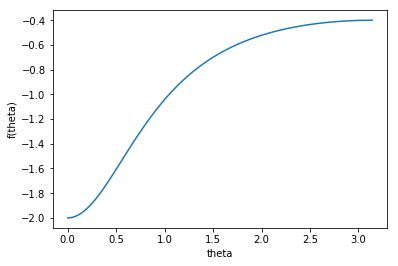

In [28]:
#plt.plot(theta,np.power(amp,2))
plt.plot(theta, amp)
plt.ylabel('f(theta)')
plt.xlabel('theta')
plt.show()

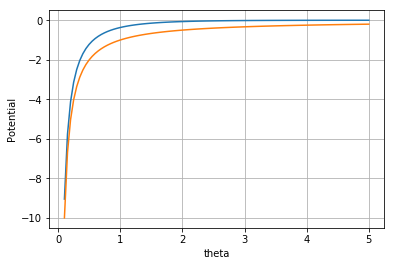

In [29]:
#Yukawa potential 
V0 = 1
r = np.linspace(0.1,5,100)
V = lambda x: -V0*np.exp(-x/mu)/x
plt.plot(r,V(r),r,-1/r)
plt.ylabel('Potential')
plt.xlabel('theta')
plt.grid()
plt.show()

Probe

# LAES

In [30]:
def yukawa_cs(theta): # ?
    m = 1
    V0 = 1
    mu = 1
    h_bar = 1
    k = 1
    
    factor = (2*m*V0/mu/h_bar**2)**2
    dsigma = factor/(2*(1-np.cos(theta))*k**2 + mu**2)**2
    return dsigma

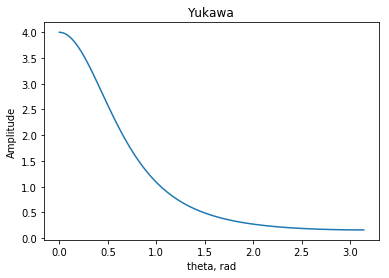

In [31]:
plt.title('Yukawa')
plt.xlabel("theta, rad")
plt.ylabel("Amplitude")
theta = np.linspace(0, np.pi, 100)
plt.plot(theta, yukawa_cs(theta))

In [32]:
def yukawa_scat_amp(theta):
    m = 1
    V0 = 1
    mu = 1
    h_bar = 1
    k = 1
    
    factor = (2*m*V0/mu/h_bar**2)
    scat_amp = factor/(2*(1-np.cos(theta))*k**2 + mu**2)
    return scat_amp

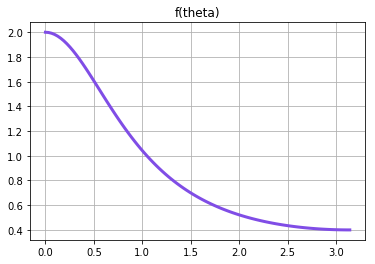

In [33]:
plt.plot(theta, yukawa_scat_amp(theta), color = [0.5, 0.3, 0.9], lw = 3)
plt.title("f(theta)")
plt.grid()

In [34]:
#Kroll 1973
def laes_cs(theta,x, v): # what is x?
    k0 = 1
    w = 2*np.pi
    m = 1
    h_bar = 1/2/np.pi
    
    k_v = np.sqrt(abs(2*m*(k0**2/2/m - v*h_bar*w))) # abs?
    
    dsigma = np.power(special.jv(v,x),2)*yukawa_cs(theta)*k_v/k0
    return dsigma

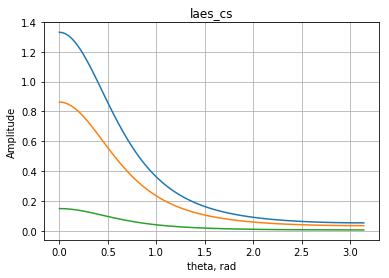

In [35]:
for i in range(1,4):
    plt.plot(theta,laes_cs(theta, 2, i))
plt.title('laes_cs')
plt.xlabel("theta, rad")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

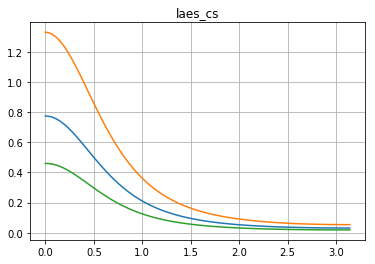

In [36]:
for i in range(1,4):
    plt.plot(theta,laes_cs(theta, i, 1))
plt.title('laes_cs')
plt.grid()

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

ValueError: operands could not be broadcast together with shapes (10,) (100,) 

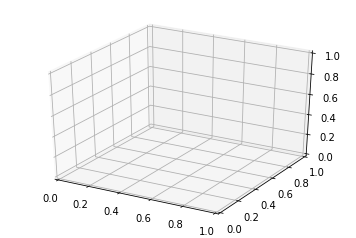

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

v = np.linspace(0,9, 10).astype(int)
x = np.linspace(0,9, 10).astype(int)

V,X = np.meshgrid(v, x)
DSIGMA,X = np.meshgrid(laes_cs(theta,x,v), x)

#z = np.linspace([0,1,])
#v = np.linspace(1,10,10)
#theta,V = np.meshgrid(x,v)

#ax.plot_surface(X, V, theta laes_cs(np.pi/10,X,V))

print(len(theta), v)

# Шредингер для потенциала в лоб

In [8]:
A0 = 10
t = np.linspace(-50,50,1000)
k = 1
r = 0
tau = 10
w = 1E0
y = A0*np.exp(-np.power(t-10,2)/tau**2)*np.cos(k*r-w*(t))

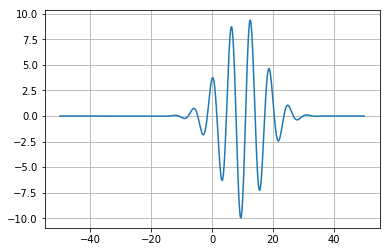

In [9]:
plt.plot(t,y)
plt.grid()
plt.show()

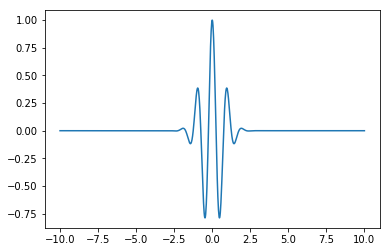

In [49]:
"""Vector potential"""
A = 1
w = 2*np.pi
T = 1
vec_pot = lambda t: A*np.exp(-t**2/T**2)*np.cos(w*t)

#check
t = np.linspace(-10, 10, 1000)
plt.plot(t, vec_pot(t))

In [261]:
angle_btwn_s_n_A = np.pi/3 # for examples
s = 2
def integ_term_2(t):
    integ = integrate.quad(vec_pot, -1000, t)
    return 1000*s*np.cos(angle_btwn_s_n_A)*integ[0]
    
def momentum_transfer(t):
    Ef = 2
    Ei = 0.5
    term_1 = (Ef-Ei)*t/h_bar
    term_2 = integ_term_2(t)
    return term_1 + term_2

In [ ]:
t = np.linspace(-10, 10, 1000)
mom_tran = []
for i in range(len(t)):
    mom_tran.append(momentum_transfer(t[i]))
plt.plot(t, mom_tran)

In [ ]:
#WTF?

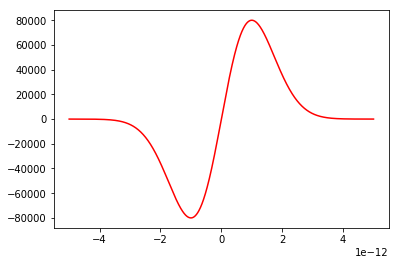

In [106]:
#Electric field
def electric_field(t):
    F0 = 0.08E6 # kV/cm
    w0 =1E12
    return F0*w0*t*np.exp(-((w0**2)*(t**2)-1)/2)

t = np.linspace(-5000e-15,5000e-15,1000)
plt.plot(t,electric_field(t), c ='r')

In [87]:
#Test 4D plot 

In [78]:
def vector_potential(t):
    F0 = 0.08E6
    w0 =1E12
    return F0*np.exp(-((w0**2)*(np.power(t,2))-1)/2)/w0

In [79]:
def dE(s_par, t):
    return scat.h_bar * scat.q_e * vector_potential(t) * s_par/scat.m

Text(0.5,0,'S_par, 1/A')

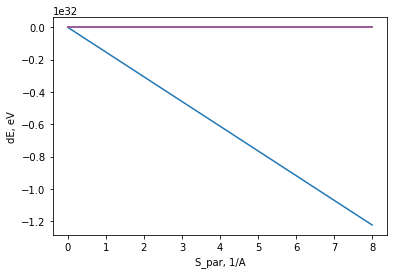

In [80]:
t = [0, 200, -200, 100, 100]
t = np.multiply(t, 1E15)
s_par = np.linspace(0,8,100)

for i in t:
    plt.plot(s_par,dE(s_par*1E10,i))
plt.ylabel("dE, eV")
plt.xlabel("S_par, 1/A")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#check representing 4d data in mplo 3d using colormaps